In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import power_transform

%matplotlib inline

C:\Users\Suria Sarath\Downloads\pyenv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [13]:
VER = '004'
NUM_STATE = 11

DATA_FOLDER = 'weather/'
DATA_FOLDER + 'weather_prediction_dataset.csv'

'weather/weather_prediction_dataset.csv'

# Load Data

In [14]:
df = pd.read_csv(DATA_FOLDER + 'weather_prediction_dataset.csv')
dflabel = pd.read_csv(DATA_FOLDER + 'weather_prediction_bbq_labels.csv')

In [15]:
df.head(4)

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_max,DE_BILT_cloud_cover,DE_BILT_wind_speed,DE_BILT_wind_gust,DE_BILT_humidity,DE_BILT_pressure,DE_BILT_global_radiation,DE_BILT_precipitation,DE_BILT_sunshine,DE_BILT_temp_mean,DE_BILT_temp_min,DE_BILT_temp_max,DRESDEN_cloud_cover,DRESDEN_wind_speed,DRESDEN_wind_gust,DRESDEN_humidity,DRESDEN_global_radiation,DRESDEN_precipitation,DRESDEN_sunshine,DRESDEN_temp_mean,DRESDEN_temp_min,DRESDEN_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_wind_gust,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_wind_gust,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_wind_gust,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MALMO_wind_speed,MALMO_precipitation,MALMO_temp_mean,MALMO_temp_min,MALMO_temp_max,MONTELIMAR_wind_speed,MONTELIMAR_humidity,MONTELIMAR_pressure,MONTELIMAR_global_radiation,MONTELIMAR_precipitation,MONTELIMAR_temp_mean,MONTELIMAR_temp_min,MONTELIMAR_temp_max,MUENCHEN_cloud_cover,MUENCHEN_wind_speed,MUENCHEN_wind_gust,MUENCHEN_humidity,MUENCHEN_pressure,MUENCHEN_global_radiation,MUENCHEN_precipitation,MUENCHEN_sunshine,MUENCHEN_temp_mean,MUENCHEN_temp_min,MUENCHEN_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_wind_gust,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,PERPIGNAN_wind_speed,PERPIGNAN_humidity,PERPIGNAN_pressure,PERPIGNAN_global_radiation,PERPIGNAN_precipitation,PERPIGNAN_temp_mean,PERPIGNAN_temp_min,PERPIGNAN_temp_max,ROMA_cloud_cover,ROMA_humidity,ROMA_pressure,ROMA_global_radiation,ROMA_sunshine,ROMA_temp_mean,ROMA_temp_min,ROMA_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9,3,0.92,1.0268,0.52,0.0,3.7,-4.9,-0.7,7,2.5,8.0,0.97,1.0240,0.11,0.10,0.0,6.1,3.5,8.1,8,3.2,7.2,0.89,0.09,0.32,0.0,1.0,-1.8,2.0,8,2.5,5.9,0.92,1.0240,0.12,0.22,0.0,4.2,2.5,6.9,7,0.94,1.0245,0.18,0.00,0.4,7.0,4.9,10.8,2.5,8.2,0.93,1.0237,0.06,0.13,0.0,3.5,1.5,5.0,6,0.4,0.83,1.0294,0.57,0.0,5.2,-4.8,-9.1,-1.3,8,3.1,7.0,0.98,1.0251,0.06,0.17,0.0,5.6,4.1,6.9,2.5,0.27,2.9,0.9,3.6,3.8,0.85,1.0269,0.30,0.0,5.5,2.5,8.5,8,2.6,9.4,0.91,1.0273,0.20,0.20,0.0,1.7,-0.5,2.6,7,0.9,5.1,0.94,1.0130,0.04,0.6,0.0,-5.0,-8.6,-3.2,4.4,0.71,1.0267,0.60,0.00,12.2,10.3,14.0,0,0.72,1.0244,0.92,8.4,1.6,3.0,8.0,7,0.89,0.82,1.34,0.0,-15.2,-17.0,-13.4,8,1.0163,0.17,0.0,-2.3,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8,8,0.94,1.0297,0.14,0.0,0.4,-3.6,-1.9,8,

In [16]:
dflabel.head(4)

,DATE,BASEL_BBQ_weather,BUDAPEST_BBQ_weather,DE_BBQ_weather,DRESDEN_BBQ_weather,DUSSELDORF_BBQ_weather,HEATHROW_BBQ_weather,KASSEL_BBQ_weather,LJUBLJANA_BBQ_weather,MAASTRICHT_BBQ_weather,MALMO_BBQ_weather,MONTELIMAR_BBQ_weather,MUENCHEN_BBQ_weather,OSLO_BBQ_weather,PERPIGNAN_BBQ_weather,SONNBLICK_BBQ_weather,STOCKHOLM_BBQ_weather,TOURS_BBQ_weather
0,20000101,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,20000102,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,20000103,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,20000104,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
dflabel['BASEL_BBQ_weather'].value_counts()

False    2717
True      937
Name: BASEL_BBQ_weather, dtype: int64

In [18]:
print('df ')
print(len(df))
print('dflabel ')
print(len(dflabel))

df 
3654
dflabel 
3654


In [19]:
dflabel.columns

Index(['DATE', 'BASEL_BBQ_weather', 'BUDAPEST_BBQ_weather', 'DE_BBQ_weather',
       'DRESDEN_BBQ_weather', 'DUSSELDORF_BBQ_weather', 'HEATHROW_BBQ_weather',
       'KASSEL_BBQ_weather', 'LJUBLJANA_BBQ_weather', 'MAASTRICHT_BBQ_weather',
       'MALMO_BBQ_weather', 'MONTELIMAR_BBQ_weather', 'MUENCHEN_BBQ_weather',
       'OSLO_BBQ_weather', 'PERPIGNAN_BBQ_weather', 'SONNBLICK_BBQ_weather',
       'STOCKHOLM_BBQ_weather', 'TOURS_BBQ_weather'],
      dtype='object')

In [20]:
df.columns.to_numpy()

array(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min',
       'BASEL_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity',
       'BUDAPEST_pressure', 'BUDAPEST_global_radiation',
       'BUDAPEST_precipitation', 'BUDAPEST_sunshine',
       'BUDAPEST_temp_mean', 'BUDAPEST_temp_max', 'DE_BILT_cloud_cover',
       'DE_BILT_wind_speed', 'DE_BILT_wind_gust', 'DE_BILT_humidity',
       'DE_BILT_pressure', 'DE_BILT_global_radiation',
       'DE_BILT_precipitation', 'DE_BILT_sunshine', 'DE_BILT_temp_mean',
       'DE_BILT_temp_min', 'DE_BILT_temp_max', 'DRESDEN_cloud_cover',
       'DRESDEN_wind_speed', 'DRESDEN_wind_gust', 'DRESDEN_humidity',
       'DRESDEN_global_radiation', 'DRESDEN_precipitation',
       'DRESDEN_sunshine', 'DRESDEN_temp_mean', 'DRESDEN_temp_min',
       'DRESDEN_temp_max', 'DUSSELDORF_cloud_cover',
       'DUSSELDORF_wind_spee

# Reformat dataframe

In [21]:
cities = ['BASEL','BUDAPEST','DRESDEN','DUSSELDORF',
          'HEATHROW','KASSEL','LJUBLJANA','MAASTRICHT','MALMO',
          'MONTELIMAR','MUENCHEN','OSLO','PERPIGNAN','SONNBLICK',
          'STOCKHOLM','TOURS']


In [22]:
features = ['cloud_cover','humidity','pressure','global_radiation',
     'precipitation','sunshine','temp_mean','temp_min','temp_max']


In [23]:
dfc = None
for c in cities:
    dfx = None
    for f in features:
        try:
            df1 = df[['DATE','MONTH',c+'_'+f]]
            df2 = pd.melt(df1, id_vars=['DATE', 'MONTH'], 
                    var_name='CITY', value_name=f)
            df2['CITY'] = c
            if dfx is None:
                dfx = df2.copy()
            else:
                dfx[f] = df2[f]
        except:
            pass

    dfx['BBQ'] = dflabel[c+'_BBQ_weather'].values.reshape(-1,1)
    if dfc is None:
        dfc = dfx.copy()
    else:
        dfc = pd.concat([dfc,dfx], axis=0)

    

In [24]:
dfc.head(3)

,DATE,MONTH,CITY,cloud_cover,humidity,pressure,global_radiation,precipitation,sunshine,temp_mean,temp_min,temp_max,BBQ
0,20000101,1,BASEL,8.0,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9,False
1,20000102,1,BASEL,8.0,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8,False
2,20000103,1,BASEL,5.0,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8,False


Check nan

In [25]:
dfc.isna().sum()

DATE                    0
MONTH                   0
CITY                    0
cloud_cover         18270
humidity             7308
pressure            10962
global_radiation     7308
precipitation           0
sunshine            14616
temp_mean               0
temp_min             3654
temp_max                0
BBQ                     0
dtype: int64

In [26]:
dfc.groupby('CITY')[features].count()

,cloud_cover,humidity,pressure,global_radiation,precipitation,sunshine,temp_mean,temp_min,temp_max
CITY,,,,,,,,,
BASEL,3654,3654,3654,3654,3654,3654,3654,3654,3654
BUDAPEST,3654,3654,3654,3654,3654,3654,3654,0,3654
DRESDEN,3654,3654,0,3654,3654,3654,3654,3654,3654
DUSSELDORF,3654,3654,3654,3654,3654,3654,3654,3654,3654
HEATHROW,3654,3654,3654,3654,3654,3654,3654,3654,3654
KASSEL,0,3654,3654,3654,3654,3654,3654,3654,3654
LJUBLJANA,3654,3654,3654,3654,3654,3654,3654,3654,3654
MAASTRICHT,3654,3654,3654,3654,3654,3654,3654,3654,3654
MALMO,0,0,0,0,3654,0,3654,3654,3654


Fill na with mean (group by date)

In [27]:
cloud_cover_mean = dfc.groupby('DATE')['cloud_cover'].mean().astype(int).reset_index()
humidity_mean = dfc.groupby('DATE')['humidity'].mean().reset_index()
pressure_mean = dfc.groupby('DATE')['pressure'].mean().reset_index()
global_radiation_mean = dfc.groupby('DATE')['global_radiation'].mean().reset_index()
sunshine_mean = dfc.groupby('DATE')['sunshine'].mean().reset_index()
temp_min_mean = dfc.groupby('DATE')['temp_min'].mean().reset_index()


In [28]:

dfc.loc[dfc.CITY == 'KASSEL', 'cloud_cover'] = cloud_cover_mean['cloud_cover']
dfc.loc[dfc.CITY == 'MALMO', 'cloud_cover'] = cloud_cover_mean['cloud_cover']
dfc.loc[dfc.CITY == 'MONTELIMAR', 'cloud_cover'] = cloud_cover_mean['cloud_cover']
dfc.loc[dfc.CITY == 'PERPIGNAN', 'cloud_cover'] = cloud_cover_mean['cloud_cover']
dfc.loc[dfc.CITY == 'TOURS', 'cloud_cover'] = cloud_cover_mean['cloud_cover']

dfc.loc[dfc.CITY == 'MALMO', 'humidity'] = humidity_mean['humidity']
dfc.loc[dfc.CITY == 'STOCKHOLM', 'humidity'] = humidity_mean['humidity']

dfc.loc[dfc.CITY == 'DRESDEN', 'pressure'] = pressure_mean['pressure']
dfc.loc[dfc.CITY == 'MALMO', 'pressure'] = pressure_mean['pressure']
dfc.loc[dfc.CITY == 'SONNBLICK', 'pressure'] = pressure_mean['pressure']

dfc.loc[dfc.CITY == 'MALMO', 'global_radiation'] = global_radiation_mean['global_radiation']
dfc.loc[dfc.CITY == 'STOCKHOLM', 'global_radiation'] = global_radiation_mean['global_radiation']

dfc.loc[dfc.CITY == 'MALMO', 'sunshine'] = sunshine_mean['sunshine']
dfc.loc[dfc.CITY == 'MONTELIMAR', 'sunshine'] = sunshine_mean['sunshine']
dfc.loc[dfc.CITY == 'PERPIGNAN', 'sunshine'] = sunshine_mean['sunshine']
dfc.loc[dfc.CITY == 'TOURS', 'sunshine'] = sunshine_mean['sunshine']

dfc.loc[dfc.CITY == 'MALMO', 'temp_min'] = temp_min_mean['temp_min']
dfc.loc[dfc.CITY == 'BUDAPEST', 'temp_min'] = temp_min_mean['temp_min']


In [29]:
dfc = dfc.reset_index()
dfc = dfc.drop('index', axis=1)

Convert column date to datetime

In [30]:
dfc['DATE'] = pd.to_datetime(dfc['DATE'], format='%Y%m%d')

Add new feature columns

In [31]:
dfc['DAY'] = dfc['DATE'].dt.day
dfc['YEAR'] = dfc['DATE'].dt.year
dfc['WEEK'] = dfc['DATE'].dt.isocalendar().week
dfc['QUARTER'] = dfc['DATE'].dt.quarter

Transform some columns to gaussian

In [52]:
#dfpt = power_transform(dfc[['humidity','pressure','global_radiation', 'precipitation','sunshine']])
dfpt = dfc[['humidity','pressure','global_radiation', 'precipitation','sunshine']]

Drop row with value -99

In [53]:
dfc = dfc.drop(dfc[dfc['cloud_cover'] == -99].index, axis=0)

# Plot Data

Plot humidity by city

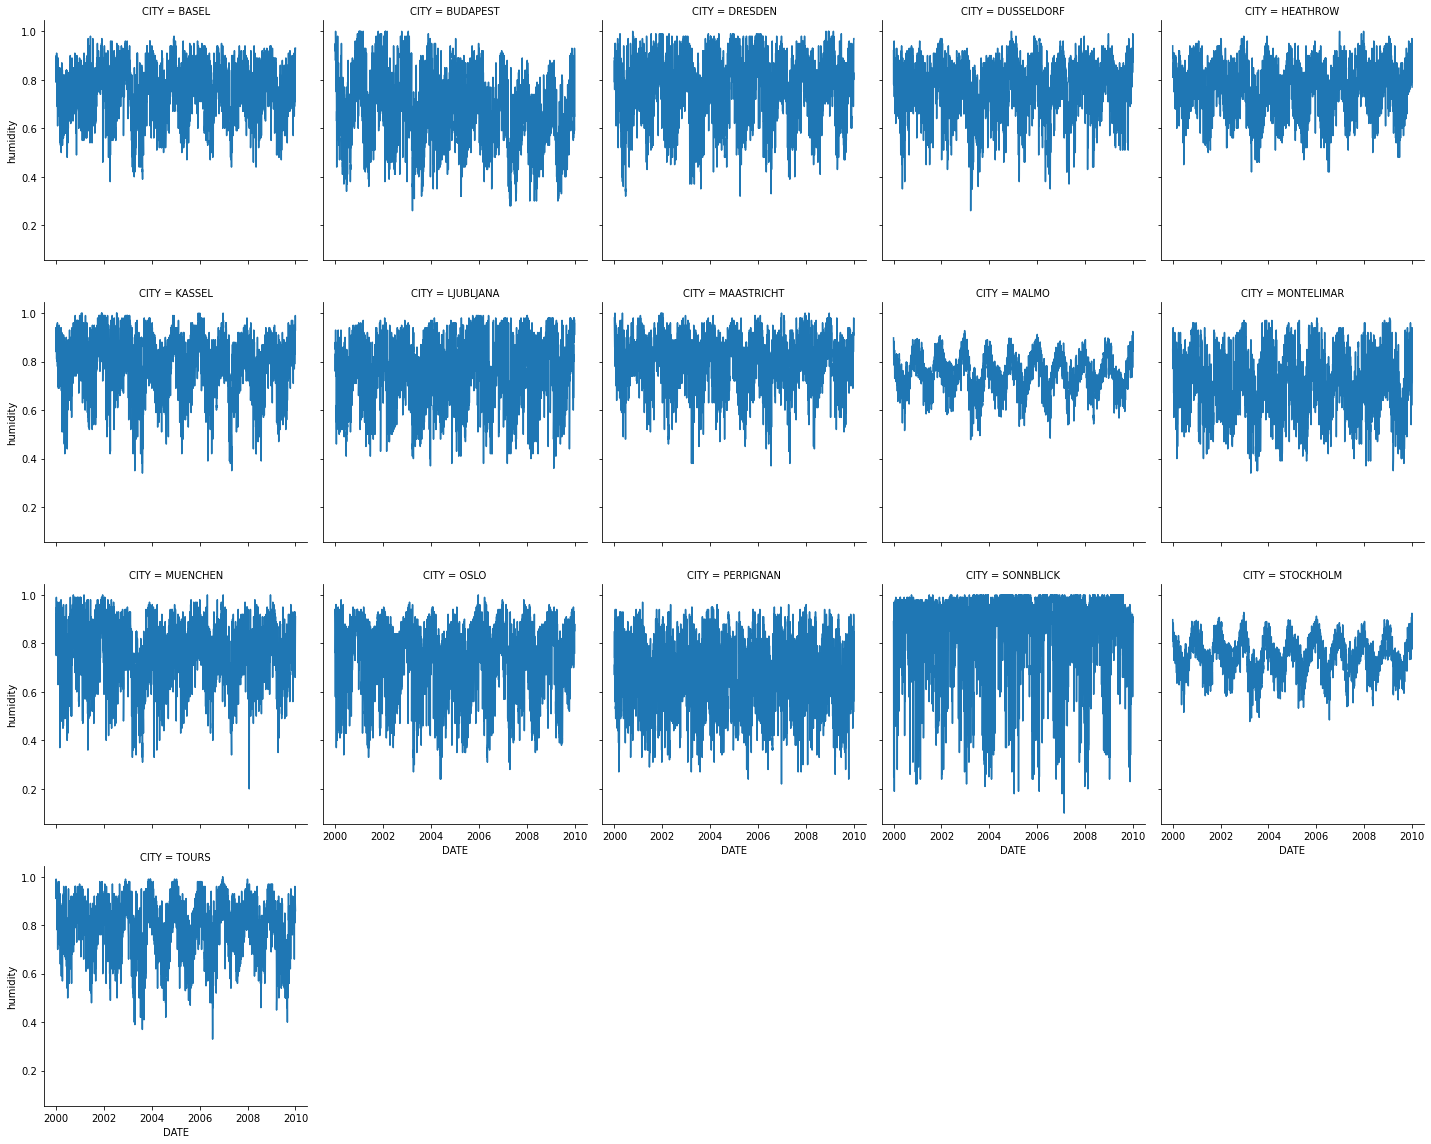

In [54]:
g = sns.FacetGrid(dfc, col="CITY", col_wrap=5, height=4)
g.map(sns.lineplot, 'DATE', 'humidity')

Plot pressure by city

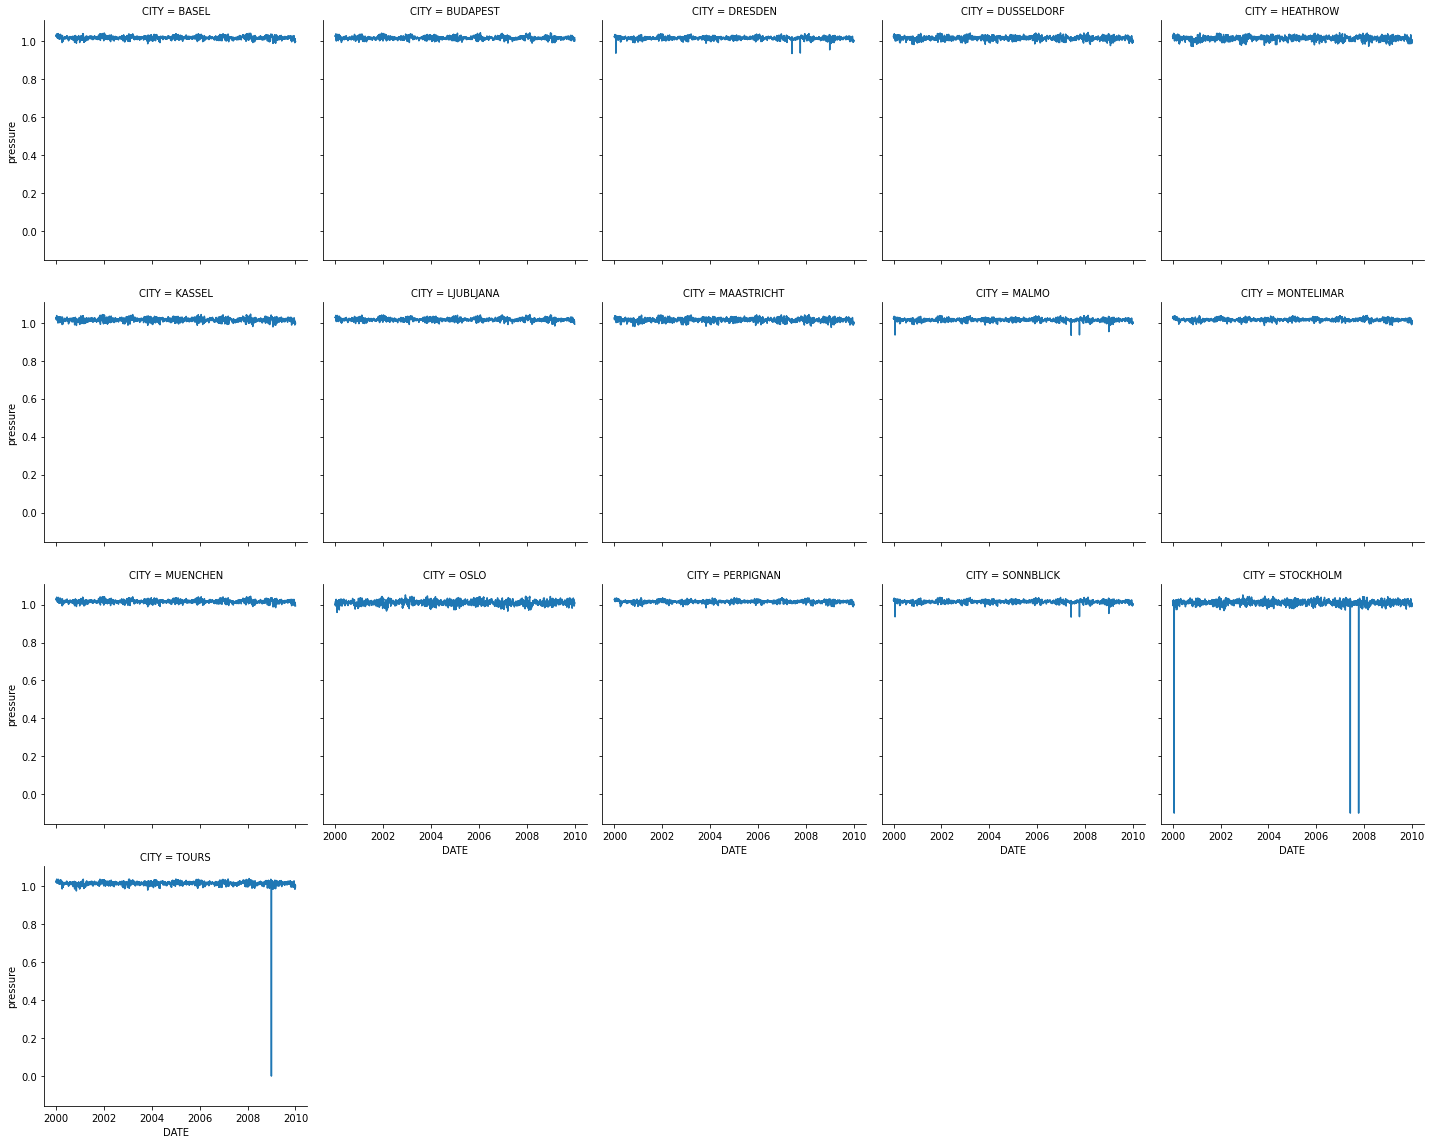

In [55]:
g = sns.FacetGrid(dfc, col="CITY", col_wrap=5, height=4)
g.map(sns.lineplot, 'DATE', 'pressure')

Plot global radiation by city

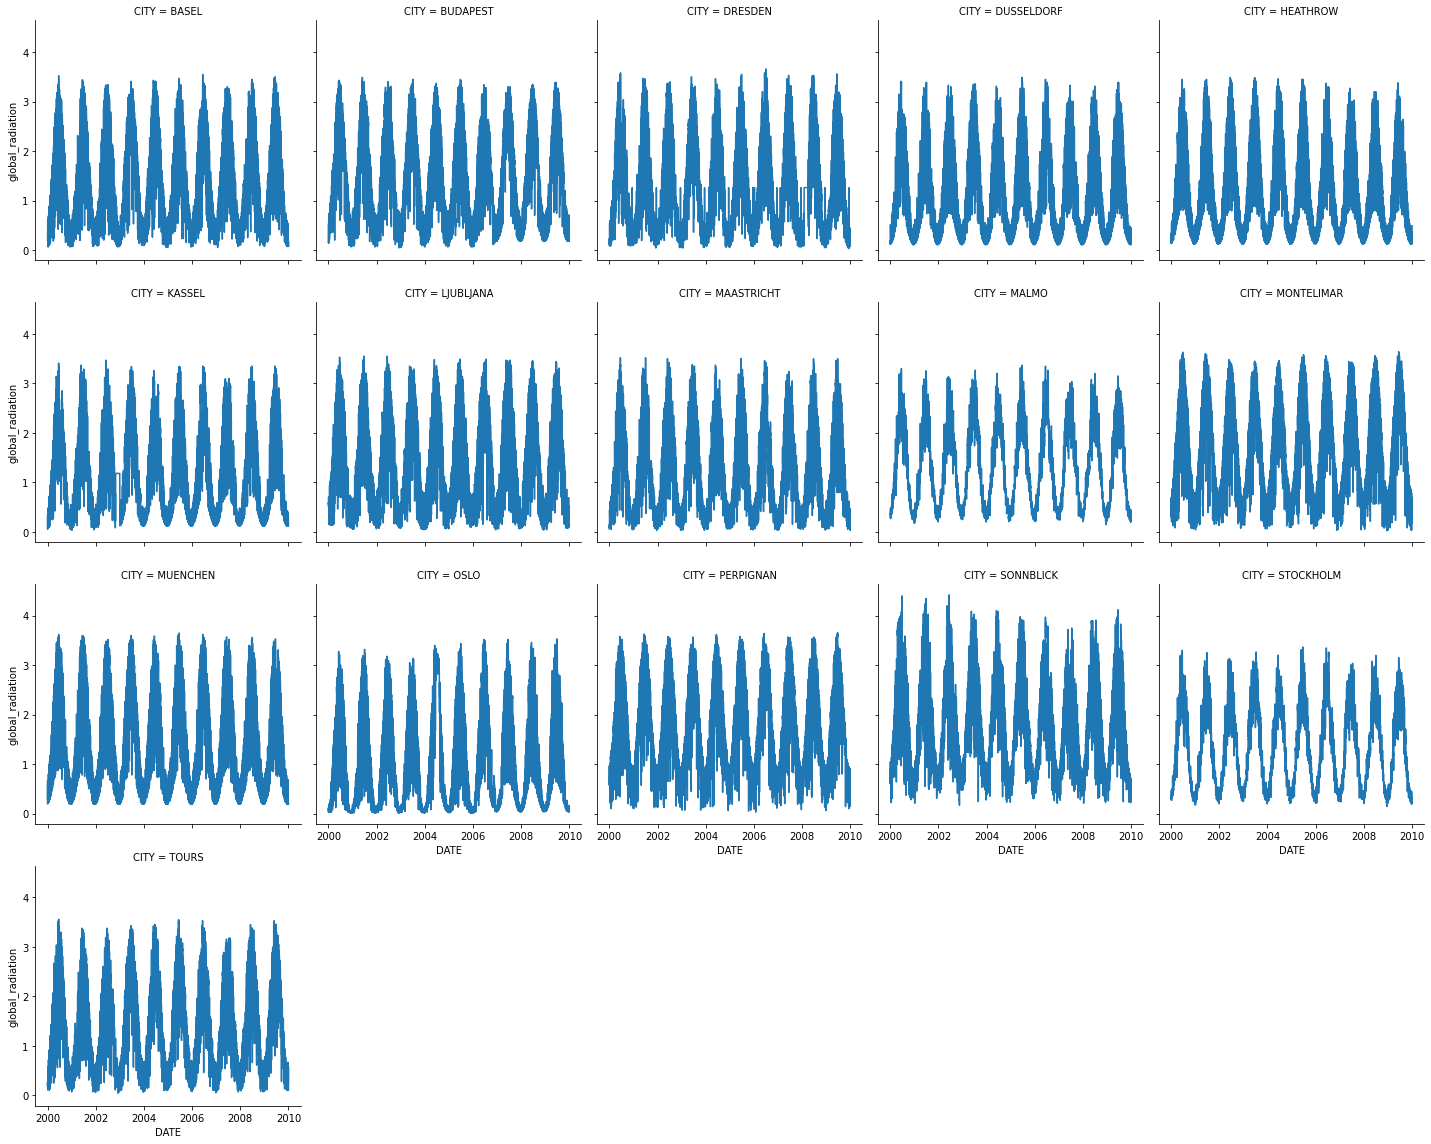

In [56]:
g = sns.FacetGrid(dfc, col="CITY", col_wrap=5, height=4)
g.map(sns.lineplot, 'DATE', 'global_radiation')

Plot precipitation by city

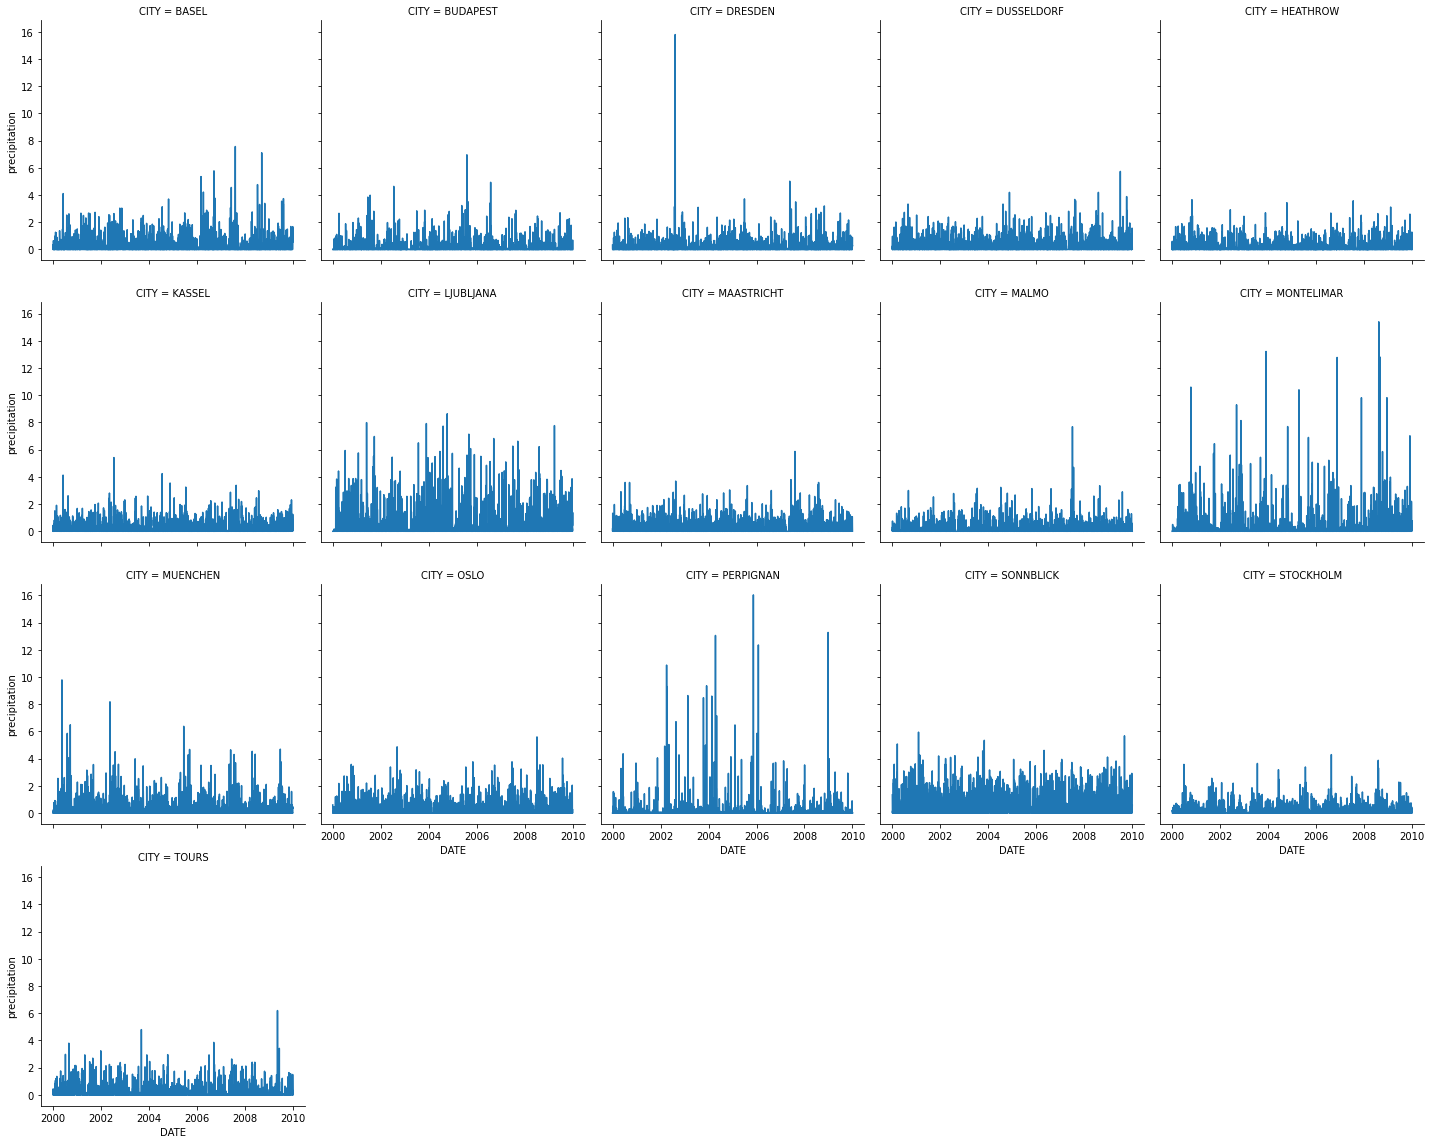

In [57]:
g = sns.FacetGrid(dfc, col="CITY", col_wrap=5, height=4)
g.map(sns.lineplot, 'DATE', 'precipitation')

Plot sunshine by city

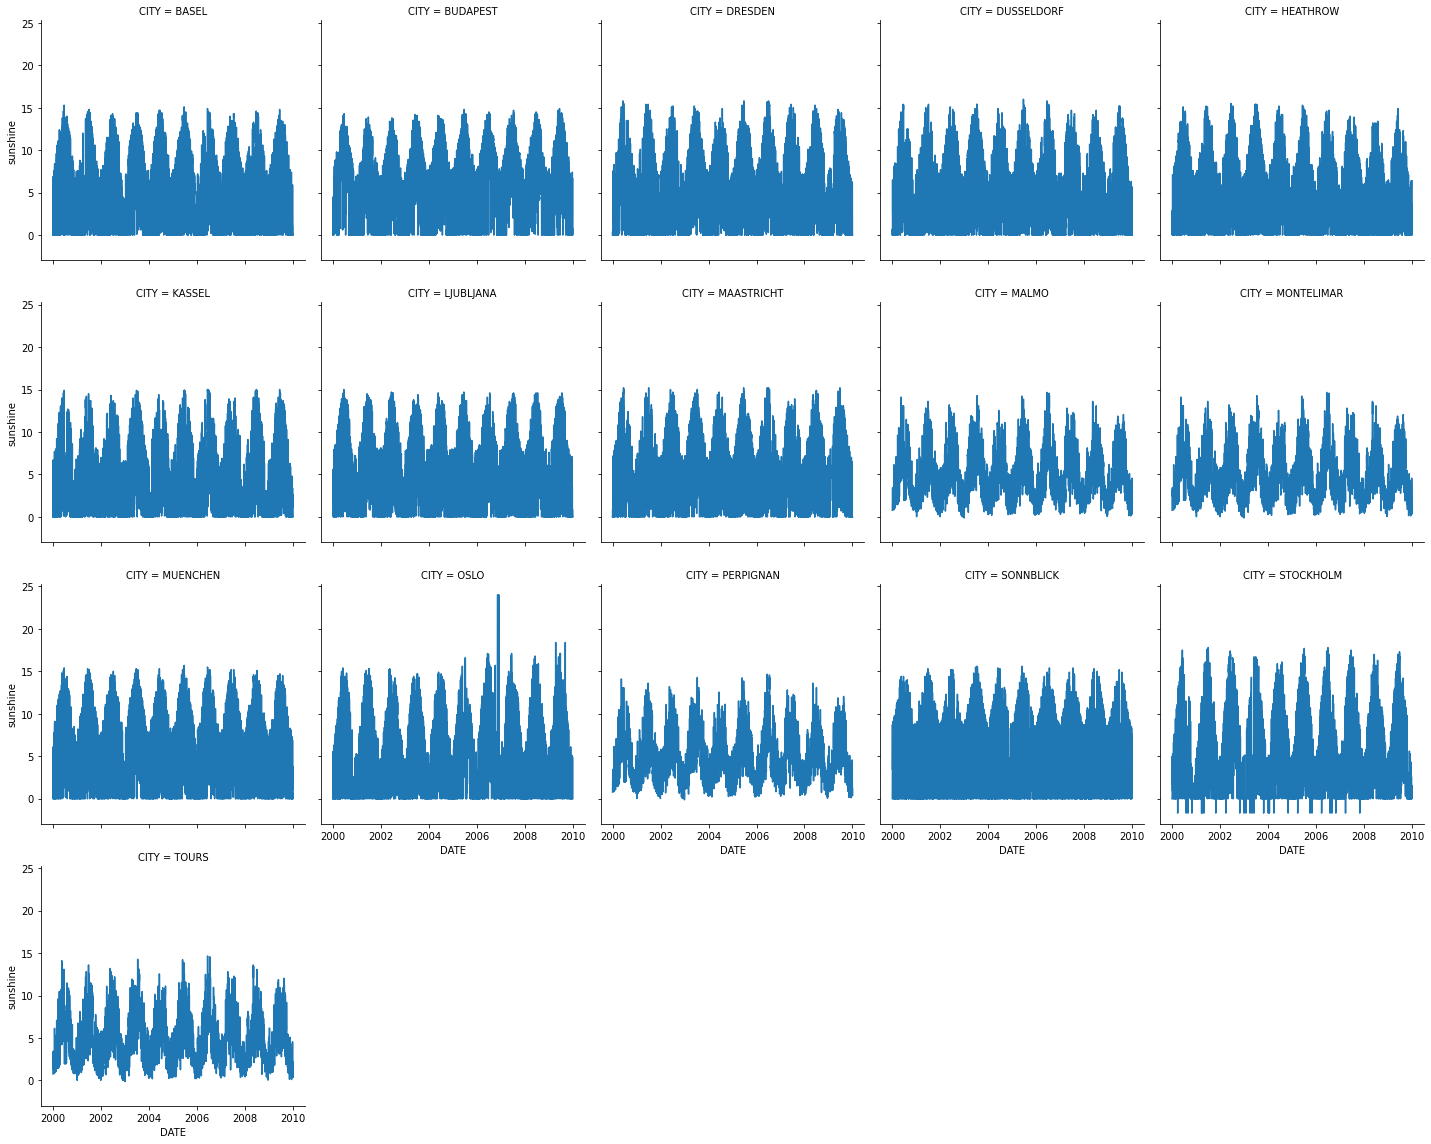

In [58]:
g = sns.FacetGrid(dfc, col="CITY", col_wrap=5, height=4)
g.map(sns.lineplot, 'DATE', 'sunshine')

Plot temp mean by city

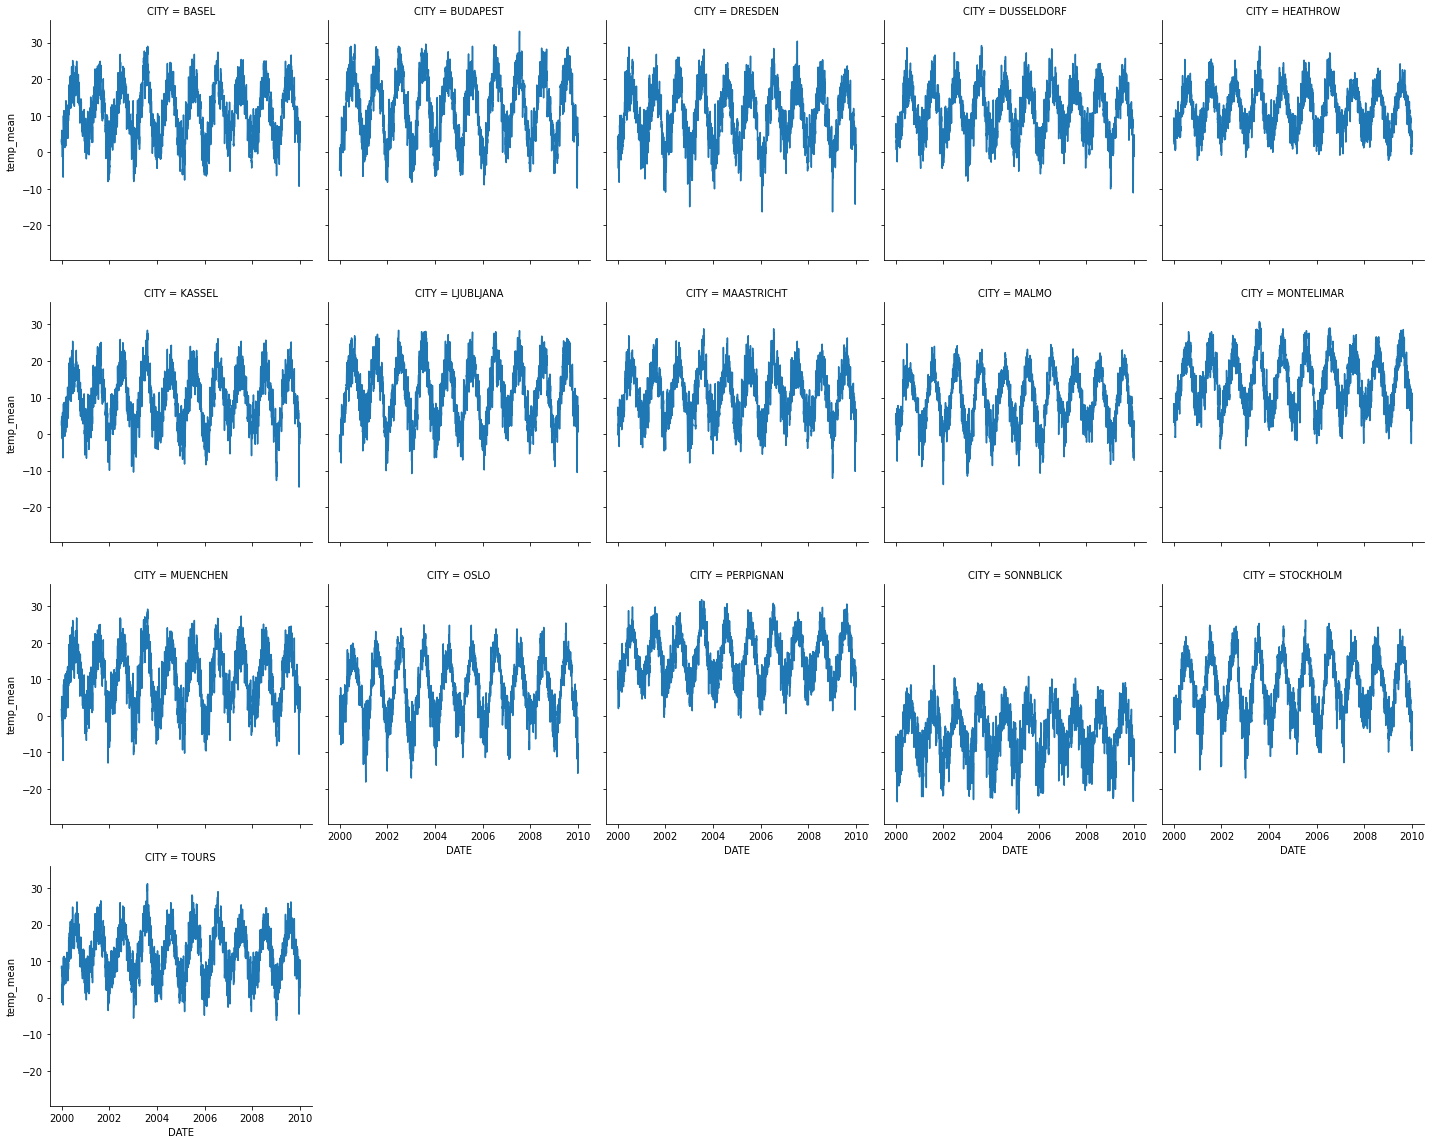

In [59]:
g = sns.FacetGrid(dfc, col="CITY", col_wrap=5, height=4)
g.map(sns.lineplot, 'DATE', 'temp_mean')

Plot temp min by city

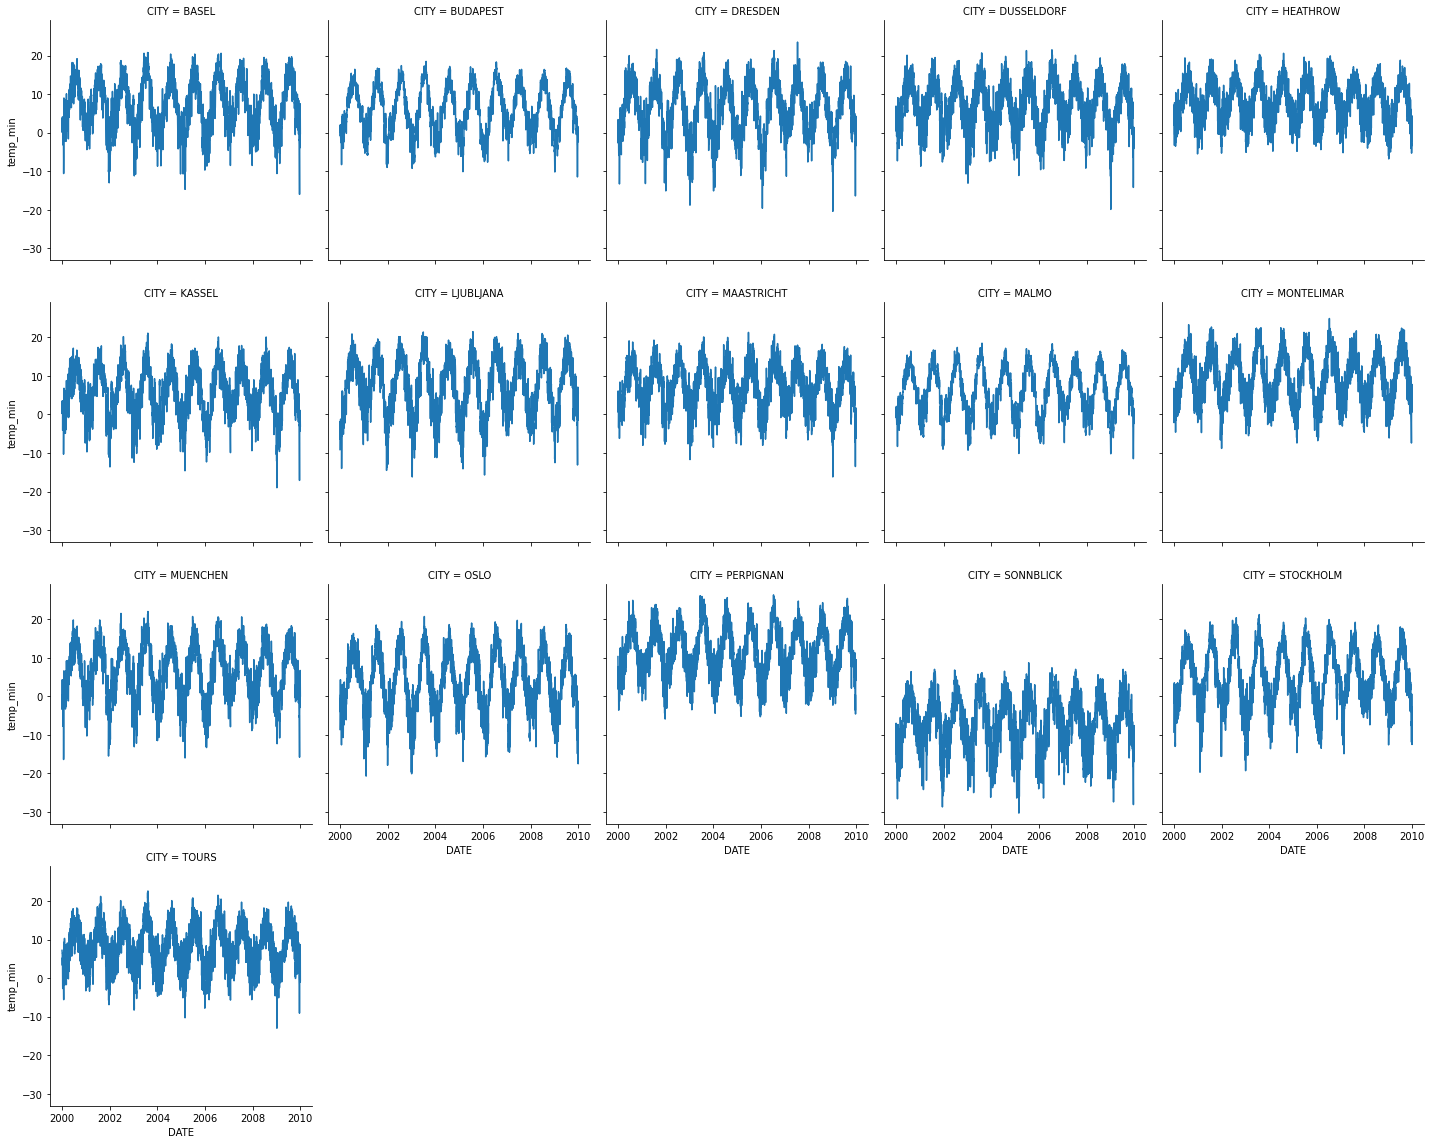

In [60]:
g = sns.FacetGrid(dfc, col="CITY", col_wrap=5, height=4)
g.map(sns.lineplot, 'DATE', 'temp_min')

Plot temp max by city

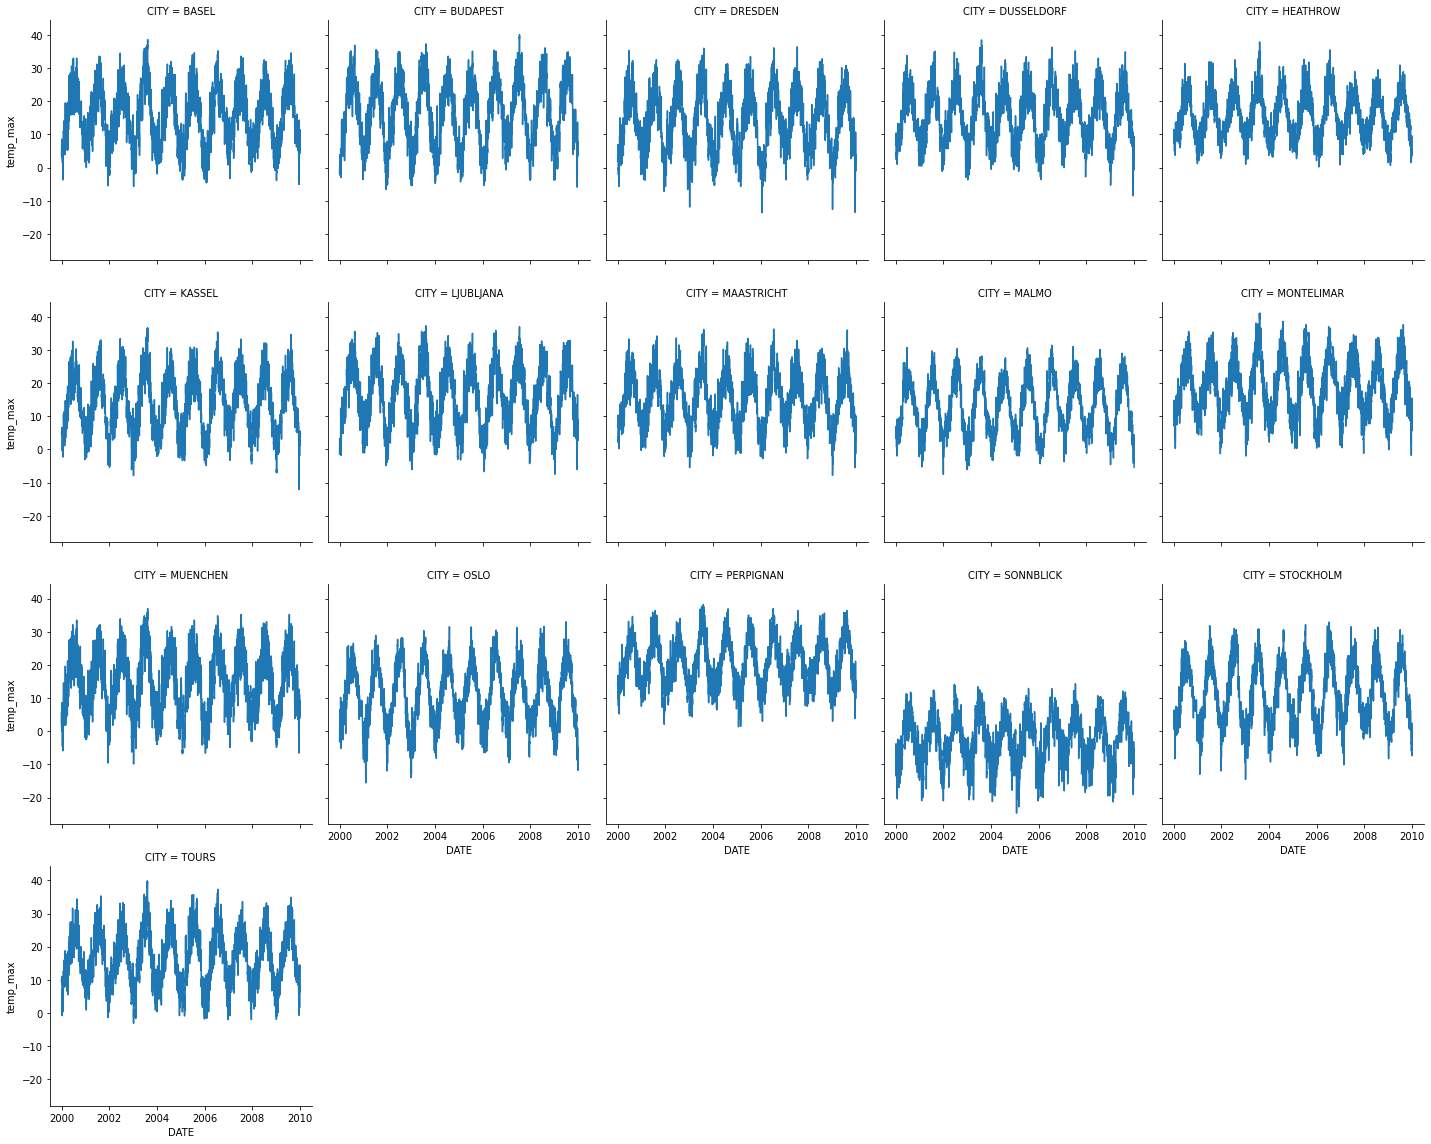

In [61]:
g = sns.FacetGrid(dfc, col="CITY", col_wrap=5, height=4)
g.map(sns.lineplot, 'DATE', 'temp_max')

Data Distribution

In [62]:
dfc.describe()

,MONTH,cloud_cover,humidity,pressure,global_radiation,precipitation,sunshine,temp_mean,temp_min,temp_max,DAY,YEAR,WEEK,QUARTER
count,58462.000000,58462.000000,58462.000000,58462.000000,58462.000000,58462.000000,58462.000000,58462.000000,58462.000000,58462.000000,58462.000000,58462.000000,58462.000000,58462.000000
mean,6.520800,5.126356,0.745597,1.015881,1.363612,0.230171,4.853827,10.013169,6.023110,14.071190,15.727122,2004.500958,26.600937,2.507937
std,3.449698,2.059089,0.135250,0.012742,0.942761,0.583379,4.133279,8.483169,7.540773,9.664202,8.803104,2.873687,15.068191,1.117296
min,1.000000,-5.000000,0.100000,-0.099000,0.010000,0.000000,-1.700000,-26.600000,-30.300000,-24.700000,1.000000,2000.000000,1.000000,1.000000
25%,4.000000,4.000000,0.660000,1.011000,0.530000,0.000000,1.100000,4.200000,0.900000,7.100000,8.000000,2002.000000,14.000000,2.000000
50%,7.000000,5.000000,0.760000,1.016300,1.190000,0.000000,4.125000,10.500000,6.600000,14.500000,16.000000,2004.000000,27.000000,3.000000
75%,10.000000,7.000000,0.850000,1.021400,2.090714,0.190000,7.800000,16.500000,11.800000,21.400000,23.000000,2007.000000,40.000000,4.000000
max,12.000000,9.000000,1.000000,1.051200,4.420000,16.040000,24.000000,33.100000,26.300000,41.100000,31.000000,2010.000000,53.000000,4.000000


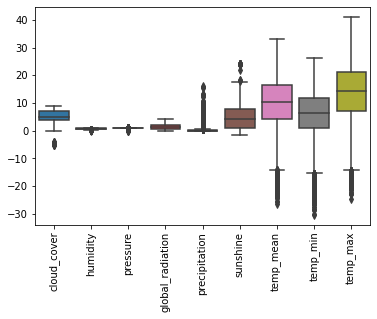

In [63]:
ax = sns.boxplot(data=dfc[features])
g = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

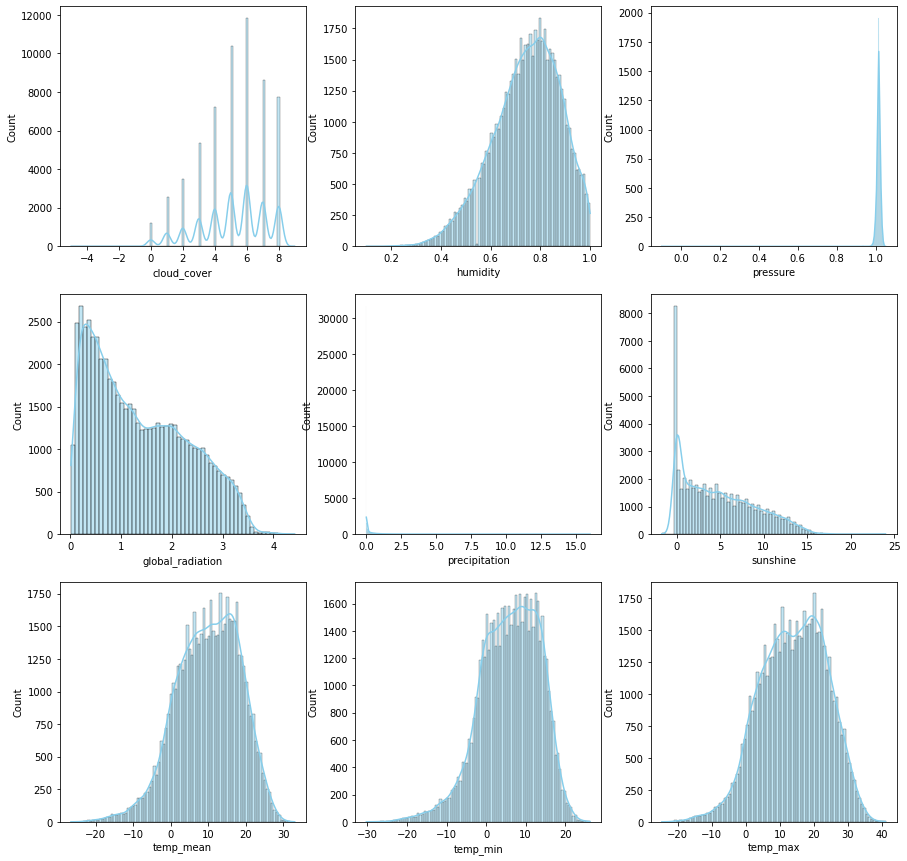

In [64]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for idx, c in enumerate(features):
    sns.histplot(data=dfc[c], kde=True, color="skyblue", ax=axs[idx // 3, idx % 3])

<AxesSubplot:xlabel='MONTH'>

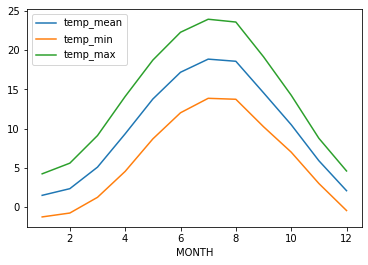

In [66]:
dfc.groupby('MONTH')[['temp_mean', 'temp_min', 'temp_max']].mean().plot()

Average of hummidity and pressure by month

<AxesSubplot:xlabel='MONTH'>

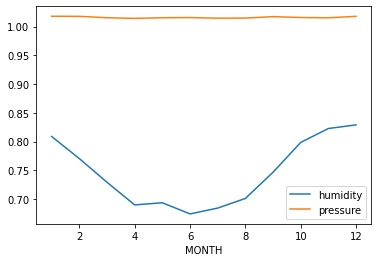

In [67]:
dfc.groupby('MONTH')[['humidity','pressure']].mean().plot()

Average of global radiation and sunshine by month

<AxesSubplot:xlabel='MONTH'>

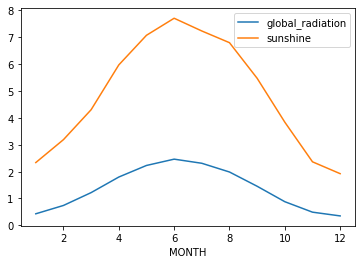

In [68]:
dfc.groupby('MONTH')[['global_radiation','sunshine']].mean().plot()

In [69]:
dfc['humidity'] = dfpt['humidity']
dfc['pressure'] = dfpt['pressure']
dfc['global_radiation'] = dfpt['global_radiation']
dfc['precipitation'] = dfpt['precipitation']
dfc['sunshine'] = dfpt['sunshine']

In [70]:
dfc = dfc.drop('DATE', axis=1)

Encode city, cloud_cover, BBQ

In [71]:
dfc = pd.get_dummies(dfc,prefix=['city','cloudcov'],columns=['CITY','cloud_cover'])

In [72]:
dfc['BBQ'] = dfc['BBQ'].astype(int)

In [73]:
dfc.head(3)

,MONTH,humidity,pressure,global_radiation,precipitation,sunshine,temp_mean,temp_min,temp_max,BBQ,DAY,YEAR,WEEK,QUARTER,city_BASEL,city_BUDAPEST,city_DRESDEN,city_DUSSELDORF,city_HEATHROW,city_KASSEL,city_LJUBLJANA,city_MAASTRICHT,city_MALMO,city_MONTELIMAR,city_MUENCHEN,city_OSLO,city_PERPIGNAN,city_SONNBLICK,city_STOCKHOLM,city_TOURS,cloudcov_-5.0,cloudcov_-4.0,cloudcov_0.0,cloudcov_1.0,cloudcov_2.0,cloudcov_3.0,cloudcov_4.0,cloudcov_5.0,cloudcov_6.0,cloudcov_7.0,cloudcov_8.0,cloudcov_9.0
0,1,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9,0,1,2000,52,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8,0,2,2000,52,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8,0,3,2000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Split train test

In [74]:
dfy = dfc.pop('BBQ')
dfy = pd.DataFrame(dfy, columns=['BBQ'])

In [75]:
xtrain, xval, ytrain, yval = train_test_split(dfc, dfy, test_size=0.2, shuffle=True, random_state=NUM_STATE)

Scale data with StandardScaler

In [76]:
sc = StandardScaler()
sc.fit(xtrain)
xtrainsc = sc.transform(xtrain)
xvalsc = sc.transform(xval)

In [ ]:
rf = RandomForestClassifier()
rf.fit(xtrainsc, ytrain.to_numpy().ravel())
ypred = rf.predict(xvalsc)

In [ ]:
print(classification_report(yval, ypred))

In [ ]:
cm = confusion_matrix(yval, ypred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap="YlGnBu")

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
rf.feature_importances_[sorted_idx]


plt.figure(figsize=(24,5))
plt.xticks(rotation = 90)
plt.bar(xtrain.columns[sorted_idx], rf.feature_importances_[sorted_idx])